In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
model_name = ["resnet34", "mobile_net_v3_large", "efficient_net_b1"]
dataset_name = "chest_xray_8"
num_epochs = "100"
lr_start = "0.01"
lr_end = "0.001"
batch_size = "32"

In [4]:
model_params = {}

In [5]:
def get_metrics(models, dataset_name, num_epochs, batch_size,
                lr_start, lr_end):
    val_acc = {}
    val_loss = {}
    val_true = {}
    val_pred = {}

    train_acc = {}
    train_loss = {}
    train_true = {}
    train_pred = {}
    
    
    for model_name in models:
        
        with open(f'../../models/val_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            val_history = pickle.load(handle)

        with open(f'../../models/train_history_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            train_history = pickle.load(handle)
        
        try:
            val_acc[model_name] = [i.item() for i in val_history['acc']]
        except:
            val_acc[model_name] = val_history['acc']
        val_loss[model_name] = val_history['loss']
        val_pred[model_name] = val_history['outputs']
        val_true[model_name] = val_history['targets']

        train_acc[model_name] = train_history['acc']
        train_loss[model_name] = train_history['loss']
        train_pred[model_name] = train_history['outputs']
        train_true[model_name] = train_history['targets']
        
    
    
    return {'train_acc': train_acc, 'train_loss': train_loss, 'train_pred': train_pred, 'train_true': train_true,
                                 'val_acc': val_acc, 'val_loss': val_loss, 'val_pred': val_pred, 'val_true': val_true}

# Chest X-Ray8

## Resnet

In [6]:
curr_model = model_name[2]
batch_size = "32"

In [7]:
with open(f'../../models/val_history_{curr_model}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    val_history = pickle.load(handle)

In [8]:
with open(f'../../models/train_history_{curr_model}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    train_history = pickle.load(handle)

In [9]:
get_metrics(model_name[0], train_history, val_history)

TypeError: get_metrics() missing 3 required positional arguments: 'batch_size', 'lr_start', and 'lr_end'

In [10]:
with open(f'../../models/eval_metrics_{curr_model}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [15]:
test

{'acc': 0.529173612764944,
 'f1': 0.326429537877648,
 'cm': array([[ 171,   71,   79,    1,  372,    5,   36],
        [  76,  294,  172,    3,  175,    4,   52],
        [  88,  106,  590,    9,  942,   13,   56],
        [  12,   29,   62,   25,  221,   15,   48],
        [ 125,   81,  177,   13, 3191,    8,   72],
        [  15,   16,   80,    9,  343,   22,   32],
        [  24,   33,   79,    3,  195,    2,  151]], dtype=int64),
 'outputs': array([4, 4, 4, ..., 2, 6, 6], dtype=int64),
 'targets': array([0, 0, 0, ..., 6, 6, 6], dtype=int64)}

# Pneumonia

In [11]:
dataset_name = "chest_xray_8"

In [12]:
batch_size = "32"        
model_params[dataset_name] = get_metrics(model_name, dataset_name, num_epochs, batch_size, lr_start, lr_end)

In [13]:
model_params[dataset_name]['train_acc'].keys()

dict_keys(['resnet34', 'mobile_net_v3_large', 'efficient_net_b1'])

In [14]:
with open(f'../../models/eval_metrics_{curr_model}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [15]:
colors_acc = {'chest_xray_8': 'yellowgreen', 'covid_pneumonia': 'lightcoral', 'pneumonia': 'cornflowerblue'}
colors_loss = {'chest_xray_8': 'green', 'covid_pneumonia': 'firebrick', 'pneumonia': 'blue'}
middle_flag = {'resnet34': False, 'efficient_net_b1': True, 'mobile_net_v3_large': False}
start_flag = {'resnet34': True, 'efficient_net_b1': False, 'mobile_net_v3_large': False}
end_flag = {'resnet34': False, 'efficient_net_b1': False, 'mobile_net_v3_large': True}

In [16]:
model_names = {'resnet34': "ResNet 34", 
               'mobile_net_v3_large': "MobileNet V3 Large", 
               'efficient_net_b1': "EfficientNet B1"}
dataset_names = {'chest_xray_8': "Chest X-ray 8", 
               'covid_pneumonia': "COVID + Pneumonia", 
               'pneumonia': "Pneumonia"}

In [17]:
model = model_name[0]

In [18]:
model_name = [ "efficient_net_b1", "resnet34", "mobile_net_v3_large"]

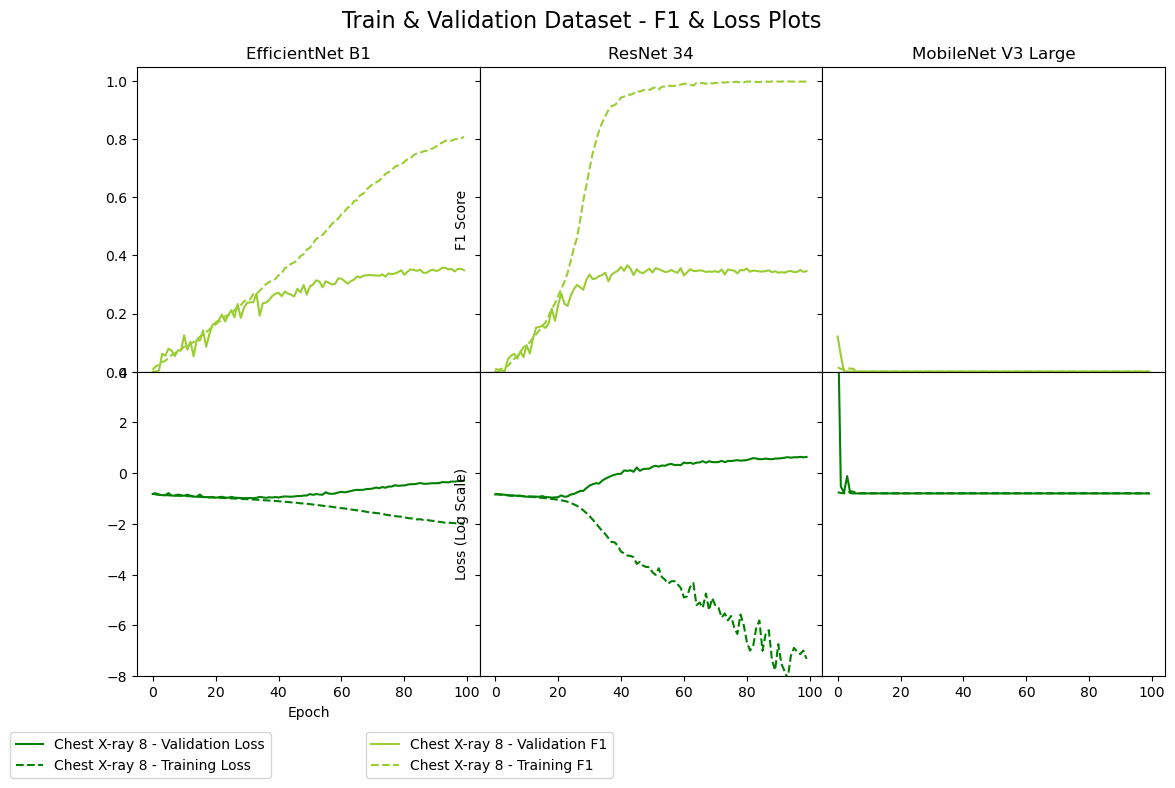

In [19]:
#fig, ax1 = plt.subplots(1,3, figsize=(12, 5))
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')


#ax2 = []
fig.suptitle(f'Train & Validation Dataset - F1 & Loss Plots', fontsize=16)
epochs = [i for i in range(int(num_epochs))]
for i in range(3):
    model = model_name[i]
    ax1[i].set_title(f'{model_names[model]}')
    # plt.figure()
    if start_flag[model]:
        ax1[i].set_ylabel('F1 Score')
    if middle_flag[model]:
        ax2[i].set_xlabel('Epoch')
    
    color = 'black'

    for data in model_params.keys():
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['val_true'][model], model_params[data]['val_pred'][model])],
                 label=f'{dataset_names[data]} - Validation F1', 
                 color=colors_acc[data])
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['train_true'][model], model_params[data]['train_pred'][model])],
                 label=f'{dataset_names[data]} - Training F1', 
                 color=colors_acc[data], linestyle='--')

    ax1[i].tick_params(axis='y', labelcolor=color)   
    ax1[i].set_ylim([0, 1.05])

    #ax2.append(ax1[i].twinx())
    color = 'black'
    
    if start_flag[model]:
        ax2[i].set_ylabel('Loss (Log Scale)', color=color)

    for data in model_params.keys():
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['val_loss'][model]),
                 label=f'{dataset_names[data]} - Validation Loss', 
                 color=colors_loss[data])
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['train_loss'][model]),
                 label=f'{dataset_names[data]} - Training Loss', 
                 color=colors_loss[data], linestyle='--')

    ax2[i].set_ylim([-8, 4])
    ax2[i].tick_params(axis='y', labelcolor=color)    
    
    if middle_flag[model]:
        ax1[i].legend(bbox_to_anchor=(1., -2.1, 0.41, 0.94))
        ax2[i].legend(bbox_to_anchor=(0., -1.1, 0.41, 0.94))

fig.tight_layout()
#fig.savefig("f1_loss_separate.png", format="png", dpi=600, bbox_inches="tight")
#fig.savefig("f1_loss_separate.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)
#fig.savefig("f1_loss_separate.pdf", format="pdf", dpi=1200, bbox_inches="tight", transparent=True)

#fig.legend(bbox_to_anchor=(0., -1., 0.41, 0.94))

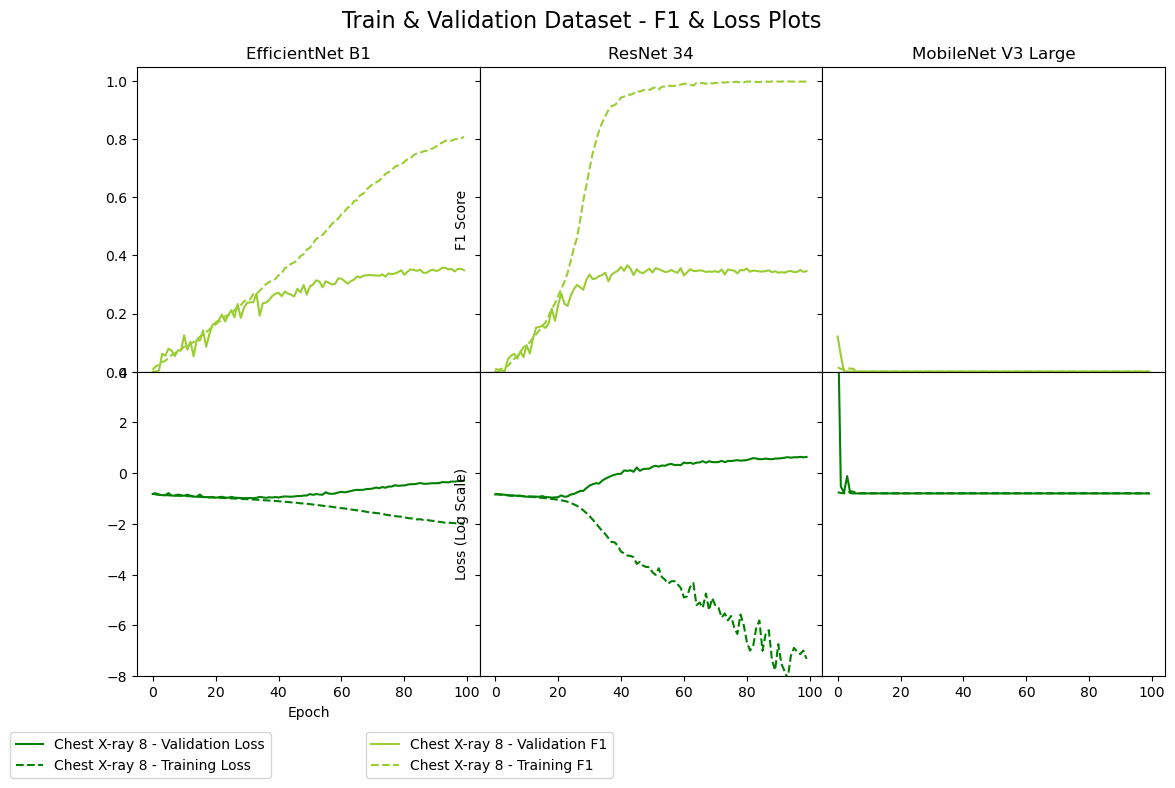

In [19]:
#fig, ax1 = plt.subplots(1,3, figsize=(12, 5))
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')


#ax2 = []
fig.suptitle(f'Train & Validation Dataset - F1 & Loss Plots', fontsize=16)
epochs = [i for i in range(int(num_epochs))]
for i in range(3):
    model = model_name[i]
    ax1[i].set_title(f'{model_names[model]}')
    # plt.figure()
    if start_flag[model]:
        ax1[i].set_ylabel('F1 Score')
    if middle_flag[model]:
        ax2[i].set_xlabel('Epoch')
    
    color = 'black'

    for data in model_params.keys():
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['val_true'][model], model_params[data]['val_pred'][model])],
                 label=f'{dataset_names[data]} - Validation F1', 
                 color=colors_acc[data])
        ax1[i].plot(epochs, 
                 [f1_score(true, pred, average='macro') for true, pred in zip(model_params[data]['train_true'][model], model_params[data]['train_pred'][model])],
                 label=f'{dataset_names[data]} - Training F1', 
                 color=colors_acc[data], linestyle='--')

    ax1[i].tick_params(axis='y', labelcolor=color)   
    ax1[i].set_ylim([0, 1.05])

    #ax2.append(ax1[i].twinx())
    color = 'black'
    
    if start_flag[model]:
        ax2[i].set_ylabel('Loss (Log Scale)', color=color)

    for data in model_params.keys():
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['val_loss'][model]),
                 label=f'{dataset_names[data]} - Validation Loss', 
                 color=colors_loss[data])
        ax2[i].plot(epochs, 
                 np.log(model_params[data]['train_loss'][model]),
                 label=f'{dataset_names[data]} - Training Loss', 
                 color=colors_loss[data], linestyle='--')

    ax2[i].set_ylim([-8, 4])
    ax2[i].tick_params(axis='y', labelcolor=color)    
    
    if middle_flag[model]:
        ax1[i].legend(bbox_to_anchor=(1., -2.1, 0.41, 0.94))
        ax2[i].legend(bbox_to_anchor=(0., -1.1, 0.41, 0.94))

fig.tight_layout()
#fig.savefig("f1_loss_separate.png", format="png", dpi=600, bbox_inches="tight")
#fig.savefig("f1_loss_separate.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)
#fig.savefig("f1_loss_separate.pdf", format="pdf", dpi=1200, bbox_inches="tight", transparent=True)

#fig.legend(bbox_to_anchor=(0., -1., 0.41, 0.94))

In [20]:
with open(f'../../models/eval_metrics_efficient_net_b1_pneumonia_tl_100_32_0.01_0.001_.pickle', 'rb') as handle:
    test = pickle.load(handle)

In [21]:
test

{'acc': 0.7958950969213228,
 'f1': 0.7822862775009373,
 'cm': array([[227,   0,   9],
        [ 10, 346,  61],
        [ 12,  87, 125]], dtype=int64),
 'outputs': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 2, 2